<a href="https://colab.research.google.com/github/mathu3004/Pearl_Path/blob/Chatbot/Pre_processing_attraction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Function to clean and process a single DataFrame
def clean_and_process_df(df):
    # Standardize column names
    df.columns = [col.strip().lower().replace(' ', '').replace('/', '') for col in df.columns]

    # Ensure all required columns exist, filling missing ones with NaN
    required_columns = [
        'name', 'address', 'addressobjcity', 'ancestorlocations1name', 'category', 'description',
        'website', 'phone', 'email', 'bookingurl', 'latitude', 'longitude', 'rankingposition',
        'rating', 'offergrouplowestprice', 'weburl', 'numberofreviews',
        'subcategories0', 'subcategories1', 'subcategories2', 'subcategories3', 'subcategories4',
        'subcategories5', 'subcategories6', 'subcategories7', 'subcategories8', 'subcategories9',
        'subtype0', 'subtype1', 'subtype2', 'subtype3', 'subtype4', 'subtype5', 'subtype6', 'subtype7',
        'subtype8', 'subtype9', 'subtype10', 'subtype11', 'subtype12', 'subtype13', 'subtype14',
        'subtype15', 'subtype16', 'subtype17', 'subtype18', 'subtype19', 'subtype20', 'subtype21',
        'subtype22', 'subtype23', 'subtype24', 'subtype25', 'subtype26', 'subtype27', 'subtype28',
        'subtype29', 'subtype30', 'subtype31', 'subtype32', 'subtype33', 'subtype34', 'subtype35',
        'subtype36', 'subtype37', 'subtype38', 'subtype39', 'subtype40', 'subtype41', 'subtype42',
        'subtype43', 'subtype44', 'subtype45',
        'offergroupofferlist0primarycategory', 'offergroupofferlist0title', 'offergroupofferlist0price', 'offergroupofferlist0url',
        'offergroupofferlist1primarycategory', 'offergroupofferlist1title', 'offergroupofferlist1price', 'offergroupofferlist1url',
        'offergroupofferlist2primarycategory', 'offergroupofferlist2title', 'offergroupofferlist2price', 'offergroupofferlist2url',
        'offergroupofferlist3primarycategory', 'offergroupofferlist3title', 'offergroupofferlist3price', 'offergroupofferlist3url'
    ]
    for col in required_columns:
        if col not in df.columns:
            df[col] = None

    # Rename columns as specified
    df.rename(columns={
        'name': 'Name',
        'address': 'Address',
        'addressobjcity': 'City',
        'ancestorlocations1name': 'Province',
        'category': 'Category',
        'description': 'Description',
        'website': 'Website',
        'phone': 'Phone',
        'email': 'Email',
        'bookingurl': 'Booking URL',
        'latitude': 'Latitude',
        'longitude': 'Longitude',
        'rankingposition': 'Ranking_Position',
        'rating': 'Rating',
        'offergrouplowestprice': 'Lowest Price',
        'weburl': 'Review URL',
        'numberofreviews': 'Review Count'
    }, inplace=True)

    # Filter rows based on the 'City' column
    valid_cities = ['Kandy', 'Nuwara Eliya', 'Ella', 'Colombo']
    df = df[df['City'].isin(valid_cities)]

    # Process the 'Description' column
    df['Description'] = df['Description'].fillna('no description')

    # Process the 'Website' column
    df['Website'] = df['Website'].fillna('no website')

    # Process the 'Phone' column
    df['Phone'] = df['Phone'].apply(lambda x: x if (isinstance(x, str) and ('+' in x or x.isdigit())) else 'no phone')

    # Process the 'Email' column
    df['Email'] = df['Email'].fillna('no email')

    # Process the 'Booking URL' column
    df['Booking URL'] = df['Booking URL'].fillna('no booking url')

    # Process the 'Latitude' and 'Longitude' columns
    df['Latitude'] = df['Latitude'].fillna('no latitude')
    df['Longitude'] = df['Longitude'].fillna('no longitude')

    # Process the 'Lowest Price' column
    df['Lowest Price'] = df['Lowest Price'].fillna('No price mentioned')

    # Process the 'Review Count' column
    df['Review Count'] = df['Review Count'].fillna(0).astype(int)

    # Combine subcategories into one column
    subcategories_cols = [f'subcategories{i}' for i in range(10)]
    df['Sub Categories'] = df[subcategories_cols].apply(lambda row: ','.join(row.dropna()) if not row.isnull().all() else 'no sub category', axis=1)

    # Combine subtypes into one column
    subtypes_cols = [f'subtype{i}' for i in range(46)]
    df['Sub Types'] = df[subtypes_cols].apply(lambda row: ','.join(row.dropna()) if not row.isnull().all() else 'no sub type', axis=1)

    # Process the 'Ranking_Position' column
    df['Ranking_Position'] = df['Ranking_Position'].fillna('no ranking')

    # Process the repeated offerGroup/offerList columns
    for i in range(4):
        primary_category_col = f'offergroupofferlist{i}primarycategory'
        title_col = f'offergroupofferlist{i}title'
        price_col = f'offergroupofferlist{i}price'
        url_col = f'offergroupofferlist{i}url'

        df[f'Primary Category {i+1}'] = df[primary_category_col].fillna('No primary category')
        df[f'Title {i+1}'] = df[title_col].fillna('No title')
        df[f'Price {i+1}'] = df[price_col].fillna('No price')
        df[f'URL {i+1}'] = df[url_col].fillna('No url')

    # Drop the original subcategories and subtypes columns
    df.drop(columns=subcategories_cols + subtypes_cols, inplace=True)

    # Select and reorder columns as per the requirements
    output_df = df[[
        'Name', 'Address', 'City', 'Province', 'Category', 'Description', 'Website', 'Phone', 'Email',
        'Booking URL', 'Latitude', 'Longitude', 'Ranking_Position', 'Rating', 'Lowest Price', 'Review URL',
        'Review Count', 'Sub Categories', 'Sub Types', 'Primary Category 1', 'Title 1', 'Price 1', 'URL 1',
        'Primary Category 2', 'Title 2', 'Price 2', 'URL 2', 'Primary Category 3', 'Title 3', 'Price 3', 'URL 3',
        'Primary Category 4', 'Title 4', 'Price 4', 'URL 4'
    ]]

    return output_df

# Load the datasets
file_paths = [
    '/content/AttractionsColombo.xlsx',
    '/content/AttractionsElla.xlsx',
    '/content/AttractionsKandy.xlsx',
    '/content/AttractionsNuwaraEliya.xlsx',
]

# Check for null values and duplicates before processing
original_null_counts = []
original_duplicate_counts = []
original_row_counts = []

for file_path in file_paths:
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
        original_null_counts.append(df.isnull().sum())
        original_duplicate_counts.append(df.duplicated().sum())
        original_row_counts.append(len(df))
    else:
        raise ValueError(f"Unsupported file format for file: {file_path}")

# Clean and process each dataset
cleaned_dfs = []
for file_path in file_paths:
    if file_path.endswith('.xlsx'):
        cleaned_dfs.append(clean_and_process_df(pd.read_excel(file_path)))
    else:
        raise ValueError(f"Unsupported file format for file: {file_path}")

# Concatenate all cleaned DataFrames into one
merged_df = pd.concat(cleaned_dfs, ignore_index=True)

# Check for null values and duplicates after processing
processed_null_counts = merged_df.isnull().sum()
processed_duplicate_counts = merged_df.duplicated().sum()
processed_row_count = len(merged_df)

# Remove duplicates and rows with null values
merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)

# Get the new row count
new_row_count = len(merged_df)

# Save the merged DataFrame to a new Excel file
output_file = 'merged_processed_data_Attractions.xlsx'
merged_df.to_excel(output_file, index=False)

# Print the results
print("Original Null Counts:")
for i, null_count in enumerate(original_null_counts):
    print(f"File {i+1}:")
    print(null_count)

print("\nOriginal Duplicate Counts:")
for i, dup_count in enumerate(original_duplicate_counts):
    print(f"File {i+1}: {dup_count}")

print("\nOriginal Row Counts:")
for i, row_count in enumerate(original_row_counts):
    print(f"File {i+1}: {row_count}")

print("\nProcessed Null Counts:")
print(processed_null_counts)

print("\nProcessed Duplicate Counts:")
print(processed_duplicate_counts)

print("\nProcessed Row Count:")
print(processed_row_count)

print("\nNew Row Count (after removing duplicates and nulls):")
print(new_row_count)

print(f"Processing complete. Merged cleaned data saved to '{output_file}'")


Original Null Counts:
File 1:
address                    0
addressObj/city            0
addressObj/country         0
addressObj/postalcode     79
addressObj/state         300
                        ... 
subtype/45               299
travelerChoiceAward      300
type                       0
webUrl                     0
website                   22
Length: 219, dtype: int64
File 2:
address                    0
addressObj/city            1
addressObj/country         0
addressObj/postalcode    105
addressObj/state         300
                        ... 
subtype/25               299
travelerChoiceAward      300
type                       0
webUrl                     0
website                   83
Length: 201, dtype: int64
File 3:
address                    0
addressObj/city            1
addressObj/country         0
addressObj/postalcode    111
addressObj/state         296
                        ... 
subtype/22               299
travelerChoiceAward      300
type                       0
web

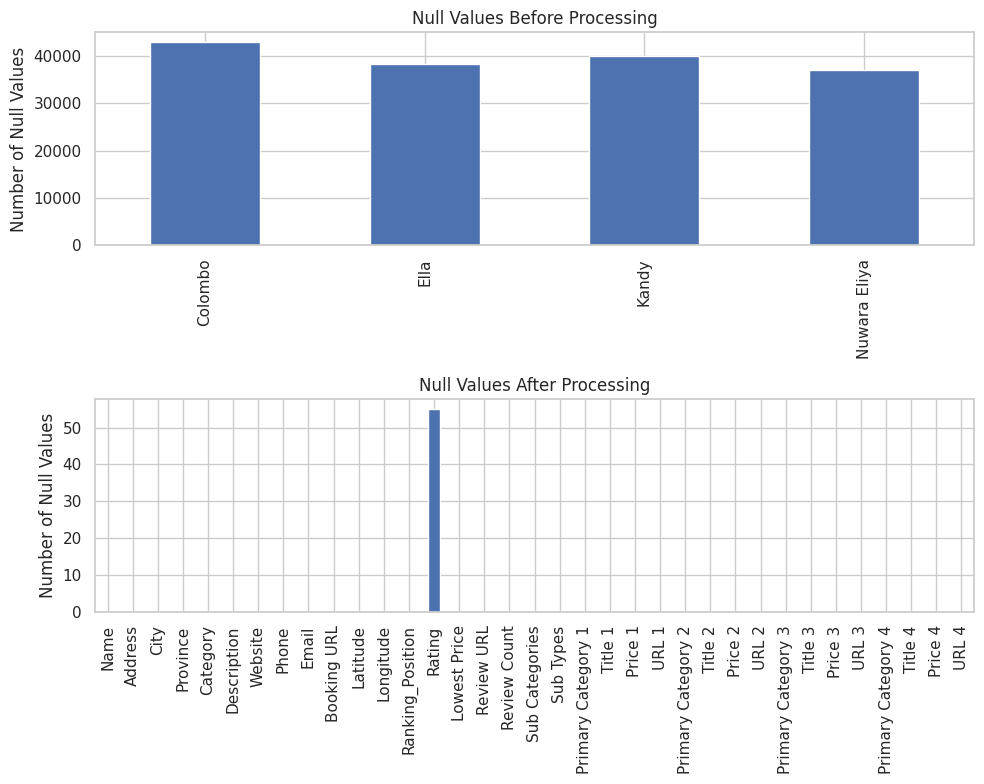

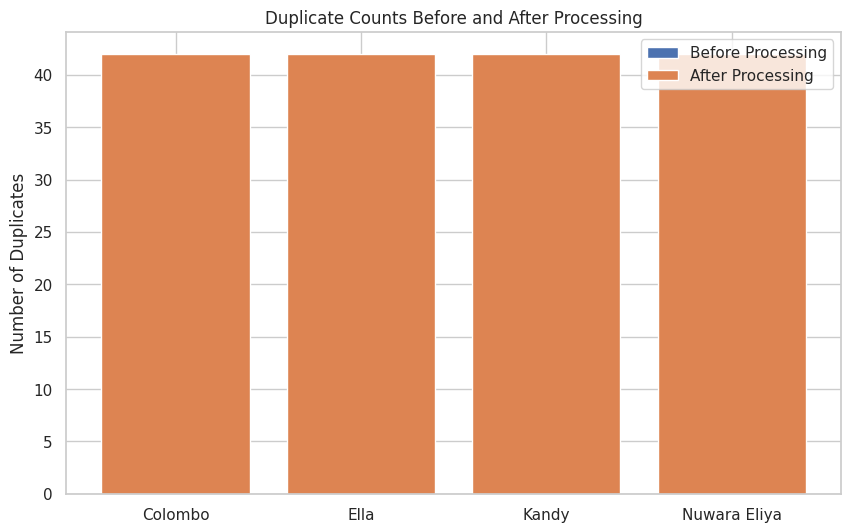

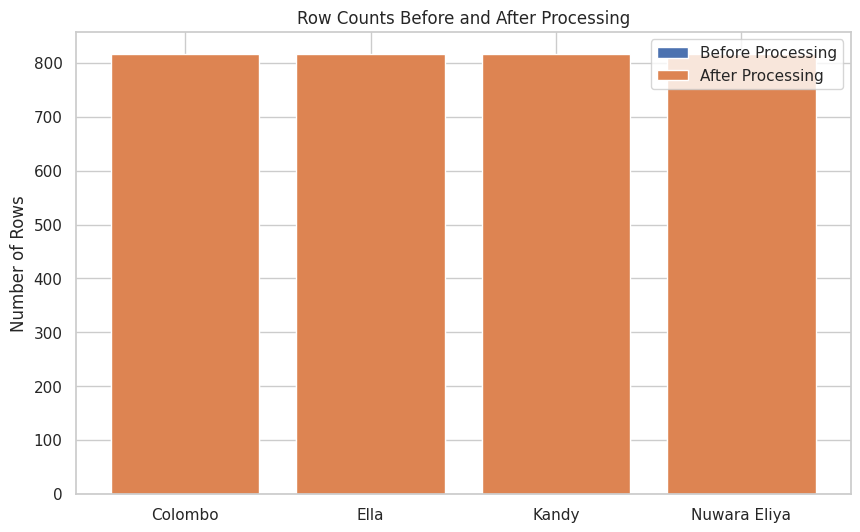

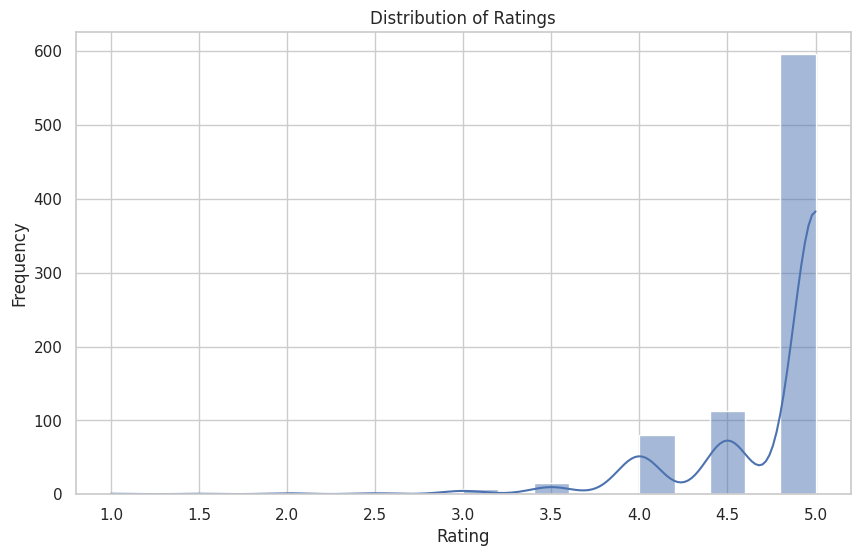

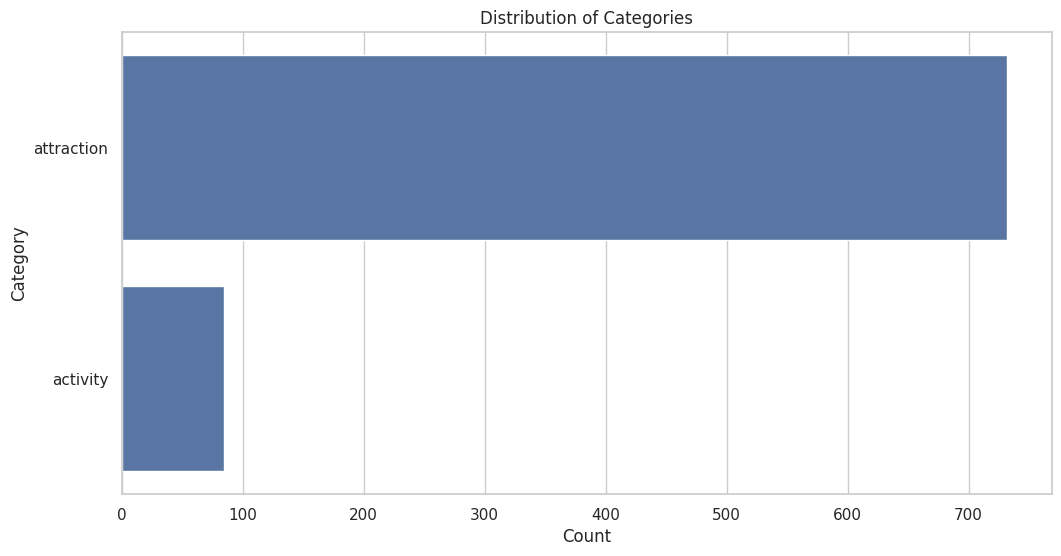

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot null values before and after processing
def plot_null_values(original_null_counts, processed_null_counts, file_names):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Plot original null values
    original_null_df = pd.concat(original_null_counts, axis=1)
    original_null_df.columns = file_names
    original_null_df.sum().plot(kind='bar', ax=axes[0], title='Null Values Before Processing')
    axes[0].set_ylabel('Number of Null Values')

    # Plot processed null values
    processed_null_counts.plot(kind='bar', ax=axes[1], title='Null Values After Processing')
    axes[1].set_ylabel('Number of Null Values')

    plt.tight_layout()
    plt.show()

# Function to plot duplicate counts before and after processing
def plot_duplicate_counts(original_duplicate_counts, processed_duplicate_counts, file_names):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot original duplicate counts
    ax.bar(file_names, original_duplicate_counts, label='Before Processing')

    # Plot processed duplicate counts
    ax.bar(file_names, [processed_duplicate_counts] * len(file_names), label='After Processing')

    ax.set_title('Duplicate Counts Before and After Processing')
    ax.set_ylabel('Number of Duplicates')
    ax.legend()

    plt.show()

# Function to plot row counts before and after processing
def plot_row_counts(original_row_counts, new_row_count, file_names):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot original row counts
    ax.bar(file_names, original_row_counts, label='Before Processing')

    # Plot new row count
    ax.bar(file_names, [new_row_count] * len(file_names), label='After Processing')

    ax.set_title('Row Counts Before and After Processing')
    ax.set_ylabel('Number of Rows')
    ax.legend()

    plt.show()

# Function to plot the distribution of ratings
def plot_rating_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Rating'], bins=20, kde=True)
    plt.title('Distribution of Ratings')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

# Function to plot the distribution of categories
def plot_category_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
    plt.title('Distribution of Categories')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

# File names for plotting
file_names = ['Colombo', 'Ella', 'Kandy', 'Nuwara Eliya']

# Plot null values before and after processing
plot_null_values(original_null_counts, processed_null_counts, file_names)

# Plot duplicate counts before and after processing
plot_duplicate_counts(original_duplicate_counts, processed_duplicate_counts, file_names)

# Plot row counts before and after processing
plot_row_counts(original_row_counts, new_row_count, file_names)

# Plot the distribution of ratings
plot_rating_distribution(merged_df)

# Plot the distribution of categories
plot_category_distribution(merged_df)
